## Business Problem
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
 Which variables are significant in predicting the price of a house, and
 How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.



## Business Goal 

You are required to model the price of houses with the available independent variables. 
This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Approach for Solving the Problem:
   
### Step 1: Reading and Understanding the Data
### Step 2: Data Cleaning
      1.Data Imputation
      2.Outlier Treatment
### Step 3: Data Visualization
### Step 4: Data Preparation
        1.Scaling
        2.Converting categorical variables to Numerical variables
### Step 5: Recursive feature elimination (RFE)
### Step 6: Model Building and Evaluation
        Linear Regression
        1.Ridge
        2.Lasso

## Importing Required  Libraries

In [483]:
# Standarad libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Train_test split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,mean_squared_error

# Scaling Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#RFE technique
from sklearn.feature_selection import RFE

#decompostion
from sklearn.decomposition import PCA

#Pipeline
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LinearRegression , Lasso, Ridge
from sklearn.linear_model import LogisticRegression

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### Step1 : Reading and Understanding the Data


In [484]:
# Reading CSV file
data = pd.read_csv("train.csv")

In [485]:
# Glimpse of data of first 5 rows
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [486]:
# Calculating missign_values percentage and creating a dataframe of it.
missing = pd.DataFrame(100*(data.isnull().sum()/len(data.index)))
missing.reset_index(inplace = True)
# SVM - Sum of values missing
missing.columns = ['col','SVM']

<IPython.core.display.Javascript object>

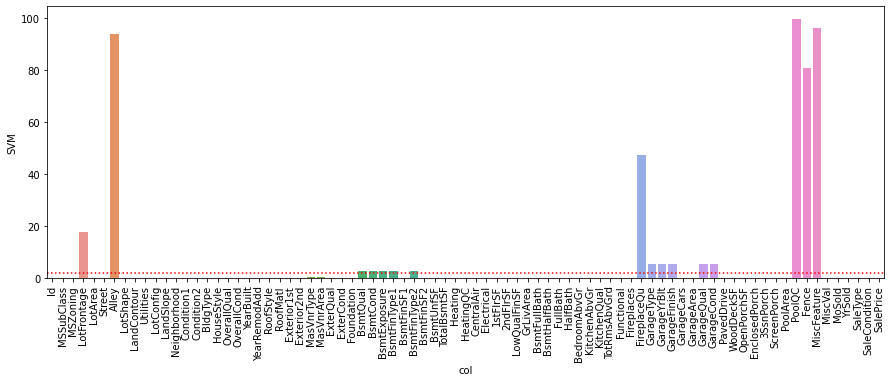

In [487]:
# Plotting the mising values against the columns
plt.figure(figsize = (15,5))
sns.barplot(y = missing.SVM , x = missing.col)
plt.axhline(y = 2, color = 'r', linestyle=':')
plt.xticks(rotation = 90)
plt.show()

### Conclusion: 
####  Columns - 'Alley','PoolQC', 'Fence', 'MiscFeature' has more than 85% values-we can remove, however better to see the approriate way of imputing values.
#### Columns with 2% missing values'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2- Need to be imputed in betterway

In [488]:
# To get the list of columns(missing_values >2 %) to be removed
missing[missing.SVM > 2]
columns_to_be_removed = list((missing[missing.SVM > 0]).iloc[:,0])
columns_to_be_removed

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [489]:
#Creating a copy of the original data
df = data.copy()

In [490]:
# We can  drop the id column as it will not be used any more

df.drop('Id', axis = 1,inplace = True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [491]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### Lets treat  the missing values by analysing deeply
1. Categorical variables - LotFrontage,MasVnrArea
2. Numerical variables

### Numerical Variables Imputation

In [492]:
#Categorical variables
#Lets treat of missing values of 20% 
# Impute the null values with median values for LotFrontage and MasVnrArea columns
df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, df['MasVnrArea'].median())

In [493]:
# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

df['GarageYrBlt']=df['GarageYrBlt'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

# Create a new column named IsRemodelled - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years
def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
df['IsRemodelled'] = df.apply(checkForRemodel, axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,0


### Categorical variables imputation

In [494]:
# From data description
# Wherever we find Na in PoolQC column better to fillwith "NO Pool" value
df['PoolQC'] = np.where(df['PoolQC'].isnull(),"No Pool",df['PoolQC'])

# Wherever we find Na in "Fence" column better to fillwith "NoFence" value
df['Fence'] = np.where(df['Fence'].isnull(),"No Fence",df['Fence'])

# Wherever we find Na in "MiscFeature" column better to fillwith "None" value
df['MiscFeature'] = np.where(df['MiscFeature'].isnull(),"None",df['MiscFeature'])

# Wherever we find Na in "GarageQual" column better to fillwith "NoGarage" value
df['GarageQual'] = np.where(df['GarageQual'].isnull(),"No Garage",df['GarageQual'])

# Wherever we find Na in "GarageCond" column better to fillwith "NoGarage" value
df['GarageCond'] = np.where(df['GarageCond'].isnull(),"No Garage",df['GarageCond'])

# Wherever we find Na in "GarageType" column better to fillwith "NoGarage" value
df['GarageType'] = np.where(df['GarageType'].isnull(),"No Garage",df['GarageType'])

# Wherever we find Na in "GarageFinish" column better to fillwith "NoGarage" value
df['GarageFinish'] = np.where(df['GarageFinish'].isnull(),"No Garage",df['GarageFinish'])

# Wherever we find Na in "GarageFinish" column better to fillwith "NoGarage" value
df['BsmtCond'] = np.where(df['BsmtCond'].isnull(),"No Basement",df['BsmtCond'])

# Wherever we find Na in "GarageFinish" column better to fillwith "NoGarage" value
df['BsmtExposure'] = np.where(df['BsmtExposure'].isnull(),"No Basement",df['BsmtExposure'])

# Wherever we find Na in "GarageFinish" column better to fillwith "NoGarage" value
df['BsmtFinType1'] = np.where(df['BsmtFinType1'].isnull(),"No Basement",df['BsmtFinType1'])

# Wherever we find Na in "GarageFinish" column better to fillwith "NoGarage" value
df['BsmtFinType2'] = np.where(df['BsmtFinType2'].isnull(),"No Basement",df['BsmtFinType2'])

# Wherever we find Na in "GarageFinish" column better to fillwith "NoGarage" value
df['MasVnrType'] = np.where(df['MasVnrType'].isnull(),"None",df['MasVnrType'])

# Wherever we find Na in "Alley" column better to fillwith "No alley access" value
df['Alley'] = np.where(df['Alley'].isnull(),"No alley access",df['Alley'])

# Wherever we find Na in "Alley" column better to fillwith "No alley access" value
df['FireplaceQu'] = np.where(df['FireplaceQu'].isnull(),"No Fireplace",df['FireplaceQu'])

# Wherever we find Na in "BsmtQual" column better to fillwith "No Basement" value
df['BsmtQual'] = np.where(df['BsmtQual'].isnull(),"No Basement",df['BsmtQual'])

# Wherever we find Na in "BsmtQual" column better to fillwith "SBrkr" value
df['Electrical'] = np.where(df['Electrical'].isnull(),"SBrkr",df['Electrical'])


In [495]:
# Calculating missign_values percentage and creating a dataframe of it.
missing = pd.DataFrame(100*(df.isnull().sum()/len(data.index)))
missing.reset_index(inplace = True)
# SVM - Sum of values missing
missing.columns = ['col','SVM']

<IPython.core.display.Javascript object>

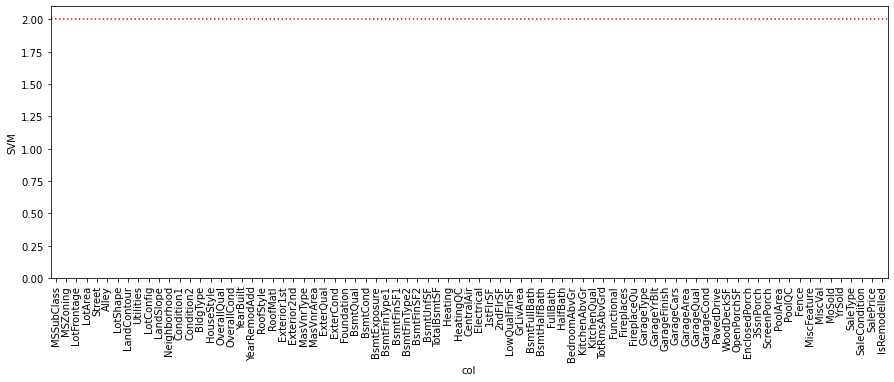

In [496]:
# Plotting the mising values against the columns
plt.figure(figsize = (15,5))
sns.barplot(y = missing.SVM , x = missing.col)
plt.axhline(y = 2, color = 'r', linestyle=':')
plt.xticks(rotation = 90)
plt.show()

In [497]:
#To evaluateif there is any missing values
df.isnull().sum().value_counts()

0    81
dtype: int64

###  Conclusion: Successfully we have removed/Imputed all the null values

## Duplicates verification

In [498]:
df[df.duplicated(keep=False)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled


## No duplicate entries 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

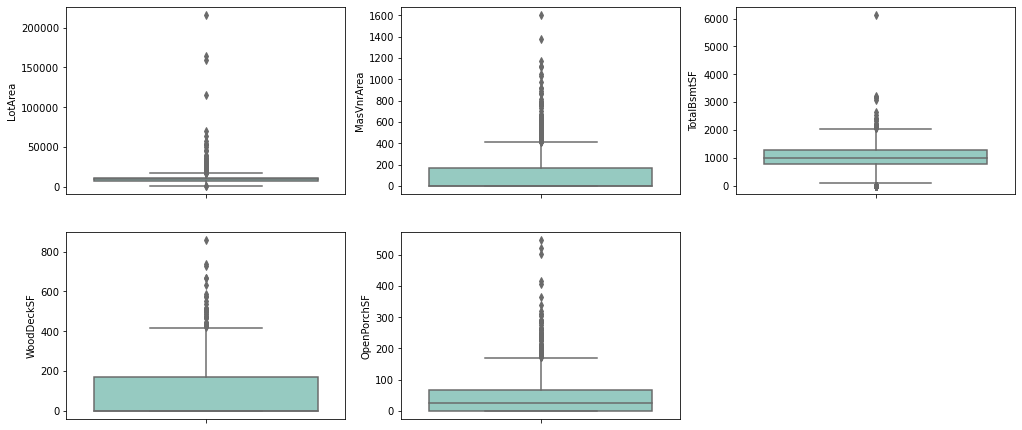

In [499]:
# TO verify the outliers
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = df)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = df)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = df)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = df)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = df)
plt.show()

In [500]:
# Removing values beyond 98% for LotArea
df = df[df["LotArea"] < df['LotArea'].quantile(0.98)]

# Removing values beyond 98% for MasVnrArea
df = df[df["MasVnrArea"] < df['MasVnrArea'].quantile(0.98)]

# Removing values beyond 99% for TotalBsmtSF
df = df[df["TotalBsmtSF"] < df['TotalBsmtSF'].quantile(0.99)]

# Removing values beyond 99% for WoodDeckSF
df = df[df["WoodDeckSF"] < df['WoodDeckSF'].quantile(0.99)]

# Removing values beyond 99% for OpenPorchSF
df = df[df["OpenPorchSF"] < df['OpenPorchSF'].quantile(0.99)]

In [501]:
# Determine the percentage of data retained

num_data = round(100*(len(df)/1460),2)
print(num_data)

93.01


# STEP 2: DATA VISUALIZATION

<IPython.core.display.Javascript object>

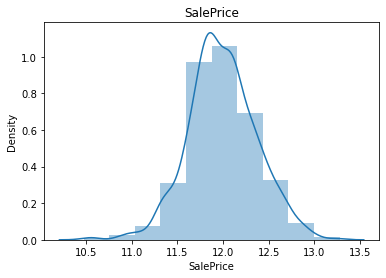

In [502]:
# Visualise the target variable -> SalePrice after transforming the sales price
df['SalePrice'] = np.log1p(df['SalePrice'])

plt.title('SalePrice')
sns.distplot(df['SalePrice'], bins=10)
plt.show()

The target value seems to be normalized

In [503]:
# Collecting columns of "int, float" dtype
columns_for_int = list(df.select_dtypes(include=['int64','float64']).columns)
print((columns_for_int))
# Collecting columns of "object" dtype
columns_for_dummies =list(df.select_dtypes(include=['object']).columns)
print((columns_for_dummies))

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'IsRemodelled']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQua

<IPython.core.display.Javascript object>

<Figure size 720x360 with 0 Axes>

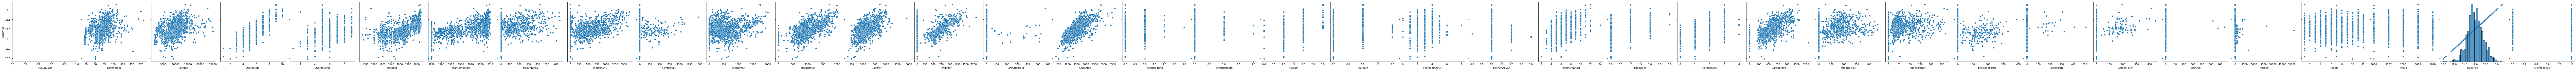

In [504]:
# Plotting Numerical variables against SalePrice
plt.figure(figsize=(10,5))
sns.pairplot(df, y_vars=['SalePrice'], x_vars=columns_for_int,height=4, aspect=1,kind='scatter')

<IPython.core.display.Javascript object>

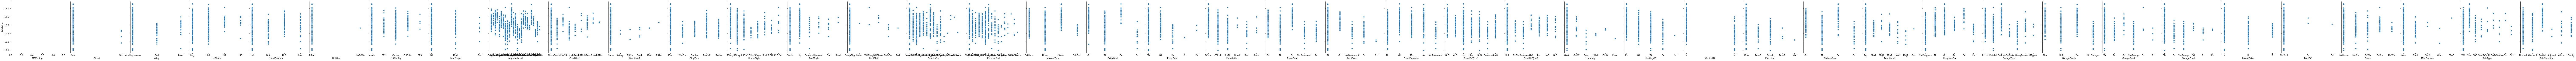

In [505]:
# Plotting Categorical variables against SalePrice
sns.pairplot(df, y_vars=['SalePrice'], x_vars=columns_for_dummies,height=4, aspect=1,kind='scatter')
plt.show()

Observations :

- 1stFlrSF, GrLivArea seems to be showing correlation towards right
- Rest of the variables are too scattered and hence can be understood their correlation from heatmap

<IPython.core.display.Javascript object>

<AxesSubplot:>

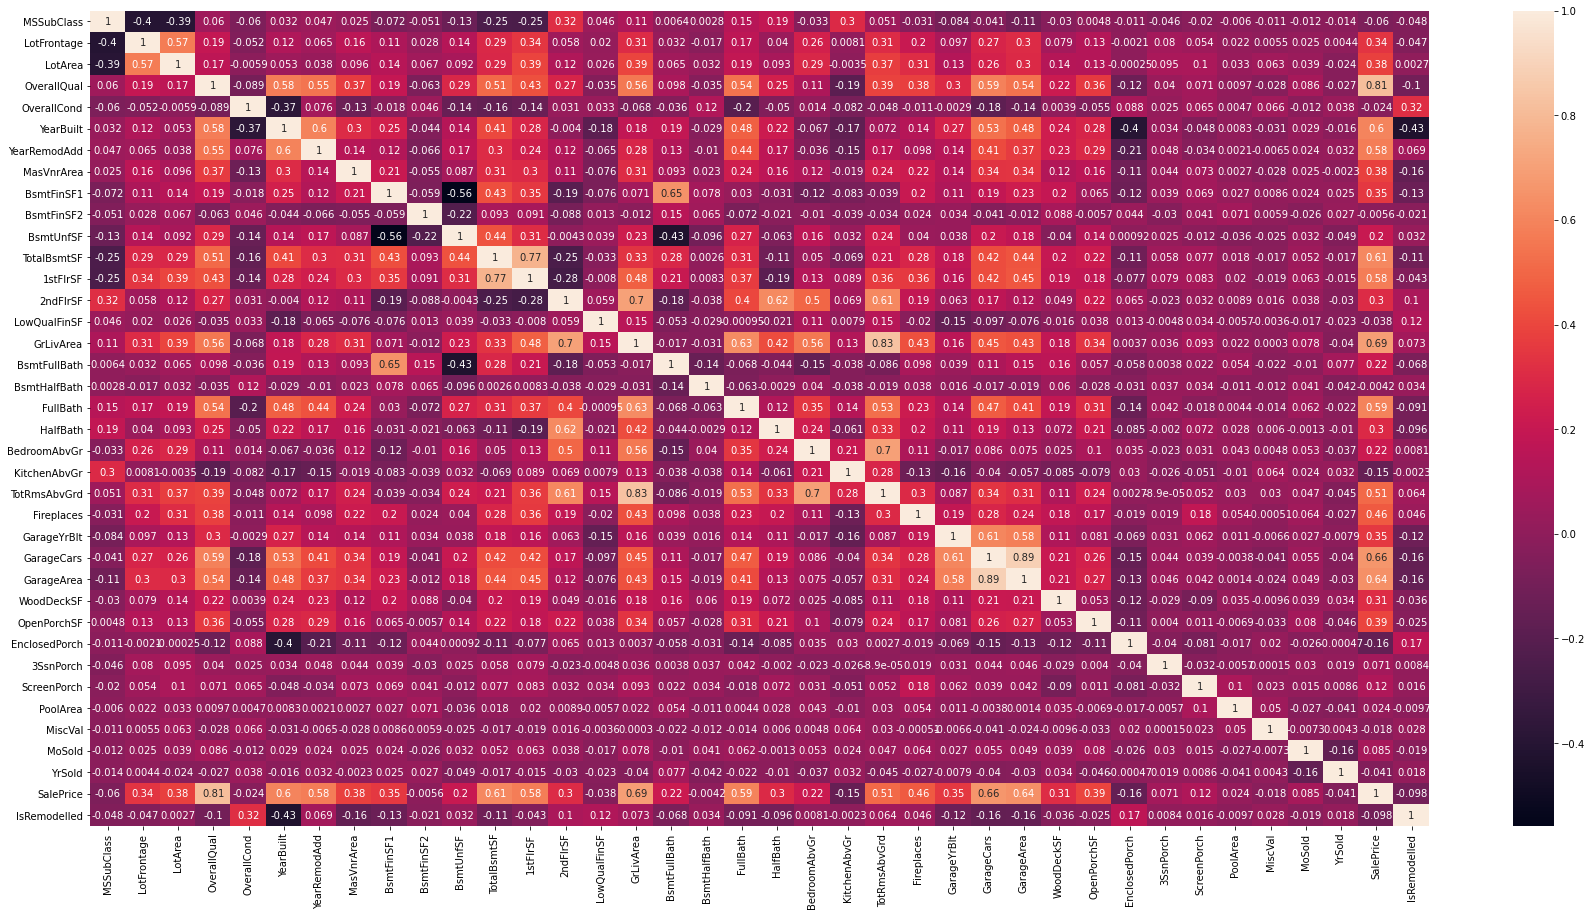

In [506]:
plt.figure(figsize = (30,15))
sns.heatmap(df.corr(),annot = True)

In [507]:
print(max(df.corr()),"\n" ,min(df.corr()))

YrSold 
 1stFlrSF


Sale price has good correaltion with OverallQual,Overallcond,YearBuilt ,FullBath,

Out of which 2 varaibles shows high correlation

- TotRmsAbvGrd and GrLivArea show 82%
- Garage Area and Garage Cars show 88%

Hence dropping TotRmsAbvGrd and Garage Cars

In [508]:
#df.drop(['TotRmsAbvGrd','GarageArea' ],axis = 1 , inplace = True)

In [509]:
#df.shape

# STEP 3:  PREPROCESSING DATA
    Converting categorical data into numerical - pd.get_dummies
    Scaling the features for better interpretabiity - MinMaxScaler

# 1. Converting categorical data into numerical

In [510]:
# syntax  for writing dumies pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)

df_final = pd.get_dummies(df, columns = columns_for_dummies,drop_first = True)
print(list(df_cat))

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'IsRemodelled', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'Alley_No alley access', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Ne

In [511]:
df_final

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,62.0,7500,7,5,2004,2005,0.0,410,0,...,0,0,0,0,1,0,0,0,1,0
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,0,1,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,0,1,0,0,0,1,0


In [512]:
# Putting feature variable to X
X = df_final.drop('SalePrice', axis=1)

# Putting response variable to y
y = df_final['SalePrice']

In [513]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 256 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int32(1), int64(34), uint8(218)
memory usage: 697.6 KB


Conclusion : All values are numerical

### 3. Splitting the Data into X (predictors) & y(predicted)

In [514]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 100)

## 2. Scaling of Data
### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [515]:
from sklearn.preprocessing import StandardScaler

In [516]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.870436,-1.134517,1.924938,-0.784505,0.400140,-0.493902,0.580302,-0.632903,2.140759,-0.282538,...,-0.056284,-0.065026,-0.303239,-0.045932,0.39104,-0.045932,-0.072739,-0.1223,0.451725,-0.305304
1,-0.870436,-0.002113,2.281275,-0.031697,-0.507099,-0.393979,-1.211478,-0.410566,2.123519,-0.282538,...,-0.056284,-0.065026,-0.303239,-0.045932,0.39104,-0.045932,-0.072739,-0.1223,0.451725,-0.305304
2,-0.400932,-0.465369,0.761202,-0.784505,1.307378,-0.760365,-1.695743,-0.632903,-0.080773,-0.282538,...,-0.056284,-0.065026,-0.303239,-0.045932,0.39104,-0.045932,-0.072739,-0.1223,0.451725,-0.305304
3,-0.870436,-0.465369,-0.449062,-0.784505,-0.507099,-0.227440,-0.969345,-0.632903,0.574358,-0.282538,...,-0.056284,-0.065026,-0.303239,-0.045932,0.39104,-0.045932,-0.072739,-0.1223,-2.213735,-0.305304
4,0.538077,2.828898,0.585123,-0.031697,1.307378,-0.427287,1.016141,-0.010360,0.766463,-0.282538,...,-0.056284,-0.065026,-0.303239,-0.045932,0.39104,-0.045932,-0.072739,-0.1223,0.451725,-0.305304


In [517]:
X_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.870436,0.564089,2.225554,-0.784505,-0.507099,0.172254,-0.388228,-0.632903,1.300912,-0.282538,...,-0.056284,-0.065026,-0.303239,-0.045932,0.39104,-0.045932,-0.072739,-0.1223,0.451725,-0.305304
1,-0.166180,-0.568315,-0.279113,-0.784505,-2.321576,-2.059369,0.531876,-0.632903,-1.004358,-0.282538,...,-0.056284,-0.065026,-0.303239,-0.045932,0.39104,21.771541,-0.072739,-0.1223,-2.213735,-0.305304
2,1.477086,-1.288936,-1.551784,1.473918,-0.507099,1.071565,0.967714,0.656650,2.377197,-0.282538,...,-0.056284,-0.065026,-0.303239,-0.045932,0.39104,-0.045932,-0.072739,-0.1223,0.451725,-0.305304
3,0.655453,-0.465369,-0.616226,-0.784505,2.214617,0.005715,0.870861,-0.632903,0.621153,-0.282538,...,-0.056284,-0.065026,-0.303239,-0.045932,0.39104,-0.045932,-0.072739,-0.1223,0.451725,-0.305304
4,0.068572,-0.002113,0.778197,-0.031697,2.214617,-0.194132,1.064567,0.530660,0.394566,-0.282538,...,-0.056284,-0.065026,-0.303239,-0.045932,0.39104,-0.045932,-0.072739,-0.1223,0.451725,-0.305304


In [518]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=255)

In [519]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [520]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

rfe_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
rfe_df = rfe_df.loc[rfe_df['rfe_support'] == True]
rfe_df.reset_index(drop=True, inplace=True)

rfe_df

,Variable,rfe_support,rfe_ranking
0,MSSubClass,True,1
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,YearBuilt,True,1
5,YearRemodAdd,True,1
6,BsmtFinSF1,True,1
7,BsmtFinSF2,True,1
8,TotalBsmtSF,True,1
9,1stFlrSF,True,1


In [521]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [522]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]


## Step 6: Model Building and Evaluation


Ridge

In [523]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    1.5s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [524]:
# dispay the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
10,0.8,-0.070243,-0.074813,1
9,0.7,-0.070230,-0.074813,2
8,0.6,-0.070216,-0.074815,3
11,0.9,-0.070255,-0.074816,4
7,0.5,-0.070203,-0.074818,5
12,1,-0.070268,-0.074819,6
6,0.4,-0.070190,-0.074820,7
5,0.3,-0.070176,-0.074824,8
4,0.2,-0.070162,-0.074829,9
3,0.1,-0.070147,-0.074838,10


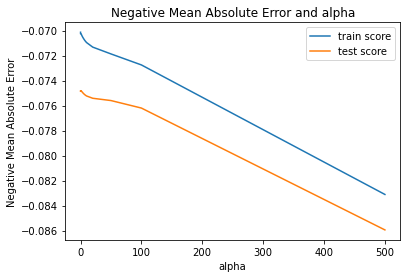

In [525]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


In [526]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=0.8)

In [527]:
# check the coefficient values with lambda = 50

alpha = 0.8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.02007576,  0.02537186,  0.07430083,  0.041958  ,  0.06024176,
        0.02463514,  0.0396363 ,  0.00793114,  0.03788486,  0.03229468,
        0.05251886,  0.005591  ,  0.07367692,  0.04988468,  0.02741328,
        0.06866876,  0.02843403,  0.11796881,  0.08228807,  0.01976752,
       -0.01584258,  0.0153607 ,  0.01528641,  0.01259906,  0.0156985 ,
       -0.02314301,  0.02990083,  0.023582  ,  0.01517569, -0.00331707,
       -0.01798165, -0.02717281, -0.02845353, -0.01209653,  0.01588776,
       -0.01905598,  0.00596323,  0.00596323, -0.01252106,  0.00596323,
       -0.01317361, -0.0039306 ,  0.00596323,  0.00570194,  0.00457731,
        0.02063975,  0.01877247,  0.15052241,  0.02262914, -0.11737096])

In [528]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.01622105006461286

In [529]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0201
1,LotArea,0.0254
2,OverallQual,0.0743
3,OverallCond,0.0420
4,YearBuilt,0.0602
5,YearRemodAdd,0.0246
6,BsmtFinSF1,0.0396
7,BsmtFinSF2,0.0079
8,TotalBsmtSF,0.0379
9,1stFlrSF,0.0323


In [530]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0201,
 'LotArea': 0.0254,
 'OverallQual': 0.0743,
 'OverallCond': 0.042,
 'YearBuilt': 0.0602,
 'YearRemodAdd': 0.0246,
 'BsmtFinSF1': 0.0396,
 'BsmtFinSF2': 0.0079,
 'TotalBsmtSF': 0.0379,
 '1stFlrSF': 0.0323,
 '2ndFlrSF': 0.0525,
 'LowQualFinSF': 0.0056,
 'GrLivArea': 0.0737,
 'GarageYrBlt': 0.0499,
 'GarageArea': 0.0274,
 'MSZoning_FV': 0.0687,
 'MSZoning_RH': 0.0284,
 'MSZoning_RL': 0.118,
 'MSZoning_RM': 0.0823,
 'Neighborhood_Crawfor': 0.0198,
 'Neighborhood_MeadowV': -0.0158,
 'Neighborhood_NridgHt': 0.0154,
 'Condition1_Norm': 0.0153,
 'BldgType_TwnhsE': 0.0126,
 'Exterior1st_BrkFace': 0.0157,
 'Exterior1st_CemntBd': -0.0231,
 'Exterior2nd_CmentBd': 0.0299,
 'Foundation_PConc': 0.0236,
 'BsmtExposure_Gd': 0.0152,
 'BsmtFinType1_No Basement': -0.0033,
 'Heating_Grav': -0.018,
 'KitchenQual_Gd': -0.0272,
 'KitchenQual_TA': -0.0285,
 'Functional_Maj2': -0.0121,
 'Functional_Typ': 0.0159,
 'FireplaceQu_No Fireplace': -0.0191,
 'GarageType_No Garage': 0.006,
 'Gara

## RFE

In [531]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [532]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
13,SaleType_New,True,1,0.1505
0,OverallQual,True,1,0.0743
5,GrLivArea,True,1,0.0737
2,YearBuilt,True,1,0.0602
6,GarageYrBlt,True,1,0.0499
1,OverallCond,True,1,0.0420
3,BsmtFinSF1,True,1,0.0396
4,TotalBsmtSF,True,1,0.0379
8,Exterior2nd_CmentBd,True,1,0.0299
9,GarageType_No Garage,True,1,0.0060


<IPython.core.display.Javascript object>

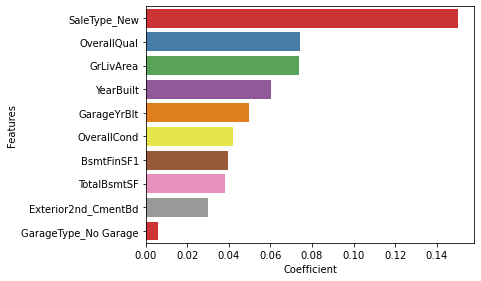

In [533]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

### The above graph displays the top 10 variables based on the Ridge Regression model that are significant in predicting the price of a house.


# Lasso

In [534]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [535]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.070286,-0.074824,1
1,0.0002,-0.070437,-0.074931,2
2,0.0003,-0.070621,-0.075070,3
3,0.0004,-0.070812,-0.075229,4
4,0.0005,-0.070995,-0.075375,5
5,0.001,-0.071942,-0.076090,6
6,0.002,-0.072674,-0.076596,7
7,0.003,-0.073347,-0.076864,8
8,0.004,-0.074013,-0.077342,9
9,0.005,-0.074631,-0.077873,10


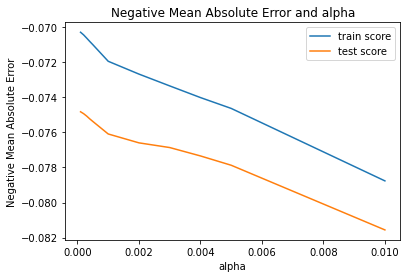

In [536]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


In [537]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [538]:
# check the coefficient values with lambda = 0.0004

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.01964841,  0.02526599,  0.07467107,  0.0419087 ,  0.06069876,
        0.02487857,  0.03950962,  0.00780412,  0.03805663,  0.02152013,
        0.0392268 ,  0.00407174,  0.08784517,  0.02492924,  0.02774791,
        0.06725338,  0.02765048,  0.1154758 ,  0.07990046,  0.01957441,
       -0.01575903,  0.01517641,  0.01518174,  0.01235901,  0.0156086 ,
       -0.01745932,  0.02422852,  0.02374199,  0.01522343, -0.00318512,
       -0.01778411, -0.02661018, -0.0278865 , -0.0119617 ,  0.01581228,
       -0.01904448, -0.        , -0.        , -0.01109293, -0.        ,
       -0.01067385, -0.00472969, -0.        ,  0.00413879,  0.00447157,
        0.01912   ,  0.01722542,  0.15212524,  0.02258568, -0.11891197])

In [539]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.016199621859616917

In [540]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0196
1,LotArea,0.0253
2,OverallQual,0.0747
3,OverallCond,0.0419
4,YearBuilt,0.0607
5,YearRemodAdd,0.0249
6,BsmtFinSF1,0.0395
7,BsmtFinSF2,0.0078
8,TotalBsmtSF,0.0381
9,1stFlrSF,0.0215


In [541]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.019648407549643695,
 'LotArea': 0.02526598860726795,
 'OverallQual': 0.07467107287848618,
 'OverallCond': 0.041908703994520534,
 'YearBuilt': 0.06069875745687143,
 'YearRemodAdd': 0.02487857171229895,
 'BsmtFinSF1': 0.039509621263997916,
 'BsmtFinSF2': 0.007804123657595561,
 'TotalBsmtSF': 0.038056634581354463,
 '1stFlrSF': 0.021520131128690823,
 '2ndFlrSF': 0.039226797771062895,
 'LowQualFinSF': 0.00407174011927897,
 'GrLivArea': 0.08784516868201428,
 'GarageYrBlt': 0.024929243517052564,
 'GarageArea': 0.027747907530218368,
 'MSZoning_FV': 0.06725338373030647,
 'MSZoning_RH': 0.027650476464206417,
 'MSZoning_RL': 0.11547579789239298,
 'MSZoning_RM': 0.07990046060366994,
 'Neighborhood_Crawfor': 0.01957440681236431,
 'Neighborhood_MeadowV': -0.015759034742272623,
 'Neighborhood_NridgHt': 0.01517640614205399,
 'Condition1_Norm': 0.015181737225654633,
 'BldgType_TwnhsE': 0.012359009038059632,
 'Exterior1st_BrkFace': 0.015608599479494226,
 'Exterior1st_CemntBd': -0.01745

### RFE

In [542]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [543]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
12,SaleType_New,True,1,0.152125
6,GrLivArea,True,1,0.087845
1,OverallQual,True,1,0.074671
3,YearBuilt,True,1,0.060699
2,OverallCond,True,1,0.041909
4,BsmtFinSF1,True,1,0.039510
5,TotalBsmtSF,True,1,0.038057
7,GarageArea,True,1,0.027748
0,LotArea,True,1,0.025266
10,Exterior2nd_CmentBd,True,1,0.024229


In [544]:
Top_5 = ['SaleType_New' , 'GrLivArea' , 'OverallQual' , 'YearBuilt', 'OverallCond']

<IPython.core.display.Javascript object>

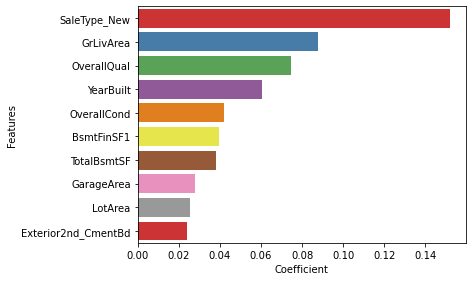

In [545]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

### The above graph displays the top 10 variables based on the Lasso Regression model that are significant in predicting the price of a house.

The optimal lambda value in case of Ridge and Lasso is as below:

    Ridge - 0.8
    Lasso - 0.0001
The Mean Squared error in case of Ridge and Lasso are:

    Ridge - 0.01622
    Lasso - 0.01619
The Mean Squared Error of Lasso is slightly lower than that of Ridge

Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.

Hence based on Lasso, the factors that generally affect the price are the Living area square feet, Overall quality and condition of the house, Foundation type of the house,Garage area, Total basement area in square feet and the Basement finished square feet area.

Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.

# PART II

### Choosing double the value of Ridge(0.8) to 1.6 and Lasso(0.0001) to 0.0002

In [546]:
# check the coefficient values with lambda = 50

alpha = 1.6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01997767,  0.02494284,  0.074718  ,  0.04182563,  0.06057434,
        0.02480906,  0.03958153,  0.00798486,  0.03779395,  0.03240146,
        0.05245005,  0.005501  ,  0.07368567,  0.03213726,  0.02766288,
        0.06566564,  0.02687876,  0.11237758,  0.07728521,  0.01976075,
       -0.01587644,  0.01535866,  0.0152197 ,  0.01246572,  0.01567432,
       -0.02182369,  0.02866884,  0.02382438,  0.01504443, -0.00330118,
       -0.01788171, -0.02651387, -0.02767041, -0.01210421,  0.01582037,
       -0.01904555,  0.00163099,  0.00163099, -0.01238392,  0.00163099,
       -0.01294856, -0.00402856,  0.00163099,  0.00554919,  0.00457745,
        0.02018935,  0.01825361,  0.13627261,  0.02297773, -0.10284942])

In [547]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.01593463941709998

In [548]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0200
1,LotArea,0.0249
2,OverallQual,0.0747
3,OverallCond,0.0418
4,YearBuilt,0.0606
5,YearRemodAdd,0.0248
6,BsmtFinSF1,0.0396
7,BsmtFinSF2,0.0080
8,TotalBsmtSF,0.0378
9,1stFlrSF,0.0324


In [549]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.02,
 'LotArea': 0.0249,
 'OverallQual': 0.0747,
 'OverallCond': 0.0418,
 'YearBuilt': 0.0606,
 'YearRemodAdd': 0.0248,
 'BsmtFinSF1': 0.0396,
 'BsmtFinSF2': 0.008,
 'TotalBsmtSF': 0.0378,
 '1stFlrSF': 0.0324,
 '2ndFlrSF': 0.0525,
 'LowQualFinSF': 0.0055,
 'GrLivArea': 0.0737,
 'GarageYrBlt': 0.0321,
 'GarageArea': 0.0277,
 'MSZoning_FV': 0.0657,
 'MSZoning_RH': 0.0269,
 'MSZoning_RL': 0.1124,
 'MSZoning_RM': 0.0773,
 'Neighborhood_Crawfor': 0.0198,
 'Neighborhood_MeadowV': -0.0159,
 'Neighborhood_NridgHt': 0.0154,
 'Condition1_Norm': 0.0152,
 'BldgType_TwnhsE': 0.0125,
 'Exterior1st_BrkFace': 0.0157,
 'Exterior1st_CemntBd': -0.0218,
 'Exterior2nd_CmentBd': 0.0287,
 'Foundation_PConc': 0.0238,
 'BsmtExposure_Gd': 0.015,
 'BsmtFinType1_No Basement': -0.0033,
 'Heating_Grav': -0.0179,
 'KitchenQual_Gd': -0.0265,
 'KitchenQual_TA': -0.0277,
 'Functional_Maj2': -0.0121,
 'Functional_Typ': 0.0158,
 'FireplaceQu_No Fireplace': -0.019,
 'GarageType_No Garage': 0.0016,
 'Garag

## RFE

In [550]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [551]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
13,SaleType_New,True,1,0.1363
0,OverallQual,True,1,0.0747
5,GrLivArea,True,1,0.0737
2,YearBuilt,True,1,0.0606
1,OverallCond,True,1,0.0418
3,BsmtFinSF1,True,1,0.0396
4,TotalBsmtSF,True,1,0.0378
6,GarageYrBlt,True,1,0.0321
8,Exterior2nd_CmentBd,True,1,0.0287
9,GarageType_No Garage,True,1,0.0016


<IPython.core.display.Javascript object>

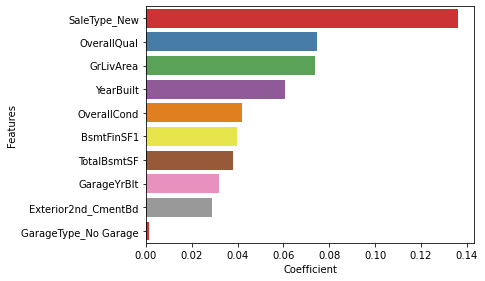

In [552]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

# PART II- LASSO

In [553]:
# check the coefficient values with lambda = 0.0004

alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.01919736,  0.02469427,  0.0756167 ,  0.04184159,  0.0605721 ,
        0.02484076,  0.03935066,  0.00776887,  0.03766235,  0.        ,
        0.01185188,  0.00085222,  0.1170819 ,  0.02350397,  0.02764656,
        0.06259509,  0.02517115,  0.10689663,  0.07213046,  0.01948428,
       -0.01563848,  0.01501664,  0.01501291,  0.01185815,  0.01550075,
       -0.01030939,  0.01712795,  0.02393162,  0.0150587 , -0.00321931,
       -0.01756375, -0.02533003, -0.02643145, -0.01175653,  0.01570248,
       -0.01903466, -0.        , -0.        , -0.00927202, -0.        ,
       -0.00780679, -0.00529919, -0.        ,  0.00287535,  0.00434684,
        0.01705792,  0.01500889,  0.13557885,  0.02297137, -0.10201859])

In [554]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.015833360777393918

In [555]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0192
1,LotArea,0.0247
2,OverallQual,0.0756
3,OverallCond,0.0418
4,YearBuilt,0.0606
5,YearRemodAdd,0.0248
6,BsmtFinSF1,0.0394
7,BsmtFinSF2,0.0078
8,TotalBsmtSF,0.0377
9,2ndFlrSF,0.0119


In [556]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.019197363804550796,
 'LotArea': 0.024694266311198046,
 'OverallQual': 0.07561670439427653,
 'OverallCond': 0.04184158899318875,
 'YearBuilt': 0.06057209819441436,
 'YearRemodAdd': 0.02484075630525216,
 'BsmtFinSF1': 0.039350662321310445,
 'BsmtFinSF2': 0.007768873312197683,
 'TotalBsmtSF': 0.03766234751186174,
 '1stFlrSF': 0.0,
 '2ndFlrSF': 0.01185187995383021,
 'LowQualFinSF': 0.0008522249067722001,
 'GrLivArea': 0.11708190354442553,
 'GarageYrBlt': 0.0235039728736372,
 'GarageArea': 0.027646558989468252,
 'MSZoning_FV': 0.06259509039543698,
 'MSZoning_RH': 0.02517115157030542,
 'MSZoning_RL': 0.10689662855026526,
 'MSZoning_RM': 0.07213046494993887,
 'Neighborhood_Crawfor': 0.01948428247922325,
 'Neighborhood_MeadowV': -0.015638480825065013,
 'Neighborhood_NridgHt': 0.015016641708539955,
 'Condition1_Norm': 0.015012907441707225,
 'BldgType_TwnhsE': 0.011858147681690075,
 'Exterior1st_BrkFace': 0.01550075416899708,
 'Exterior1st_CemntBd': -0.010309387796654058,
 'Ext

### RFE

In [557]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [558]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
12,SaleType_New,True,1,0.135579
6,GrLivArea,True,1,0.117082
1,OverallQual,True,1,0.075617
3,YearBuilt,True,1,0.060572
2,OverallCond,True,1,0.041842
4,BsmtFinSF1,True,1,0.039351
5,TotalBsmtSF,True,1,0.037662
7,GarageArea,True,1,0.027647
0,LotArea,True,1,0.024694
11,Foundation_PConc,True,1,0.023932


<IPython.core.display.Javascript object>

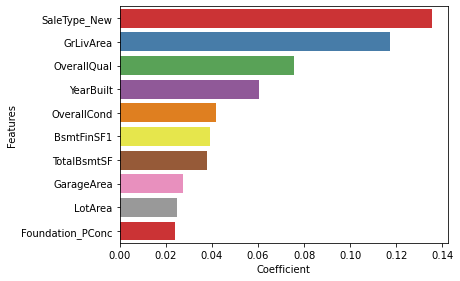

In [559]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

# Part II Q3 and  Q4

In [560]:
# Top5 variables in Lasso Regression 
## Top_5 = ['SaleType_New' , 'GrLivArea' , 'OverallQual' , 'YearBuilt', 'OverallCond']

In [561]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 100)

In [562]:
# Removing the Top 5 models from the X_train & X _test
X_train = X_train.drop(Top_5, axis = 1)
X_test =  X_test.drop(Top_5, axis = 1)

## 2. Scaling of Data
### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use Standardisation scaling.

In [563]:
from sklearn.preprocessing import StandardScaler

In [564]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train.head()

,MSSubClass,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.870436,-1.134517,1.924938,0.580302,-0.632903,2.140759,-0.282538,-0.836005,1.237067,1.380359,...,-0.086158,-0.056284,-0.065026,-0.045932,0.39104,-0.045932,-0.072739,-0.1223,0.451725,-0.305304
1,-0.870436,-0.002113,2.281275,-1.211478,-0.410566,2.123519,-0.282538,-0.833678,1.221149,1.023565,...,-0.086158,-0.056284,-0.065026,-0.045932,0.39104,-0.045932,-0.072739,-0.1223,0.451725,-0.305304
2,-0.400932,-0.465369,0.761202,-1.695743,-0.632903,-0.080773,-0.282538,-0.254102,-0.492651,-0.269082,...,-0.086158,-0.056284,-0.065026,-0.045932,0.39104,-0.045932,-0.072739,-0.1223,0.451725,-0.305304
3,-0.870436,-0.465369,-0.449062,-0.969345,-0.632903,0.574358,-0.282538,-0.882558,-0.503263,-0.476725,...,-0.086158,-0.056284,-0.065026,-0.045932,0.39104,-0.045932,-0.072739,-0.1223,-2.213735,-0.305304
4,0.538077,2.828898,0.585123,1.016141,-0.010360,0.766463,-0.282538,-0.619537,0.003449,0.669695,...,-0.086158,-0.056284,-0.065026,-0.045932,0.39104,-0.045932,-0.072739,-0.1223,0.451725,-0.305304


In [565]:
X_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)
X_test.head()

,MSSubClass,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.870436,0.564089,2.225554,-0.388228,-0.632903,1.300912,-0.282538,-0.875575,0.287314,-0.005874,...,-0.086158,-0.056284,-0.065026,-0.045932,0.39104,-0.045932,-0.072739,-0.1223,0.451725,-0.305304
1,-0.166180,-0.568315,-0.279113,0.531876,-0.632903,-1.004358,-0.282538,0.213748,-0.954263,-1.374559,...,-0.086158,-0.056284,-0.065026,-0.045932,0.39104,21.771541,-0.072739,-0.1223,-2.213735,-0.305304
2,1.477086,-1.288936,-1.551784,0.967714,0.656650,2.377197,-0.282538,-0.803419,1.528890,1.514888,...,-0.086158,-0.056284,-0.065026,-0.045932,0.39104,-0.045932,-0.072739,-0.1223,0.451725,-0.305304
3,0.655453,-0.465369,-0.616226,0.870861,-0.632903,0.621153,-0.282538,-1.066439,-0.662440,-1.052860,...,-0.086158,-0.056284,-0.065026,-0.045932,0.39104,-0.045932,-0.072739,-0.1223,0.451725,-0.305304
4,0.068572,-0.002113,0.778197,1.064567,0.530660,0.394566,-0.282538,-0.703331,-0.492651,-0.444555,...,-0.086158,-0.056284,-0.065026,-0.045932,0.39104,-0.045932,-0.072739,-0.1223,0.451725,-0.305304


In [566]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=250)

In [567]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    3.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [568]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
7,0.003,-0.070935,-0.086801,1
6,0.002,-0.068373,-0.086817,2
8,0.004,-0.073440,-0.087462,3
9,0.005,-0.075624,-0.087681,4
5,0.001,-0.065500,-0.088399,5
4,0.0005,-0.063480,-0.090339,6
3,0.0004,-0.063017,-0.090949,7
2,0.0003,-0.062570,-0.091931,8
10,0.01,-0.083287,-0.091985,9
1,0.0002,-0.062116,-0.093058,10


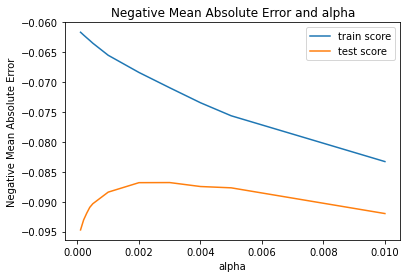

In [569]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


In [570]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.003)

In [571]:
# check the coefficient values with lambda = 0.0004

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-4.55650334e-02,  1.12270757e-02,  1.32029680e-02,  4.52587895e-02,
       -4.08605843e-03,  1.87189523e-02,  1.32151596e-03, -0.00000000e+00,
        4.13189632e-02,  7.83305079e-02,  1.06135272e-01,  5.83203146e-03,
        6.82216320e-03,  2.56425310e-03,  1.06366321e-02,  8.46657218e-03,
       -6.03700993e-04, -2.08577115e-03,  1.36882328e-02,  4.54711535e-03,
        2.68193768e-02,  7.33378074e-03,  2.55313021e-02,  1.48406736e-02,
        1.01456984e-02,  8.09861433e-03,  6.87121066e-03,  1.38965987e-02,
        1.93005528e-03,  2.65056991e-03,  3.22944909e-03, -5.69125852e-04,
       -9.86106706e-03,  8.80079070e-02,  4.17992893e-02,  1.61743558e-01,
        1.42803065e-01, -3.66718615e-03,  2.97607954e-03,  1.17650775e-02,
        2.11499313e-03,  1.35876668e-03,  6.85277293e-03,  4.34568661e-03,
       -1.46715602e-02, -4.90141045e-03,  0.00000000e+00,  7.25571065e-03,
       -3.03083101e-03, -1.98616039e-03, -3.32751224e-03, -4.16691871e-03,
       -5.08225389e-03, -

In [572]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.02078494161256932

In [573]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00000]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0456
1,LotFrontage,0.0112
2,LotArea,0.0132
3,YearRemodAdd,0.0453
4,MasVnrArea,-0.0041
...,...,...
222,SaleCondition_AdjLand,0.0158
223,SaleCondition_Alloca,0.0004
224,SaleCondition_Family,0.0056
225,SaleCondition_Normal,0.0285


In [574]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.045565033395979906,
 'LotFrontage': 0.011227075742370583,
 'LotArea': 0.013202967979565064,
 'YearRemodAdd': 0.045258789511355105,
 'MasVnrArea': -0.004086058426009751,
 'BsmtFinSF1': 0.01871895232175492,
 'BsmtFinSF2': 0.0013215159576060098,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': 0.04131896317781361,
 '1stFlrSF': 0.07833050785058983,
 '2ndFlrSF': 0.10613527194044477,
 'LowQualFinSF': 0.00583203146161752,
 'BsmtFullBath': 0.006822163203023372,
 'BsmtHalfBath': 0.002564253095972111,
 'FullBath': 0.010636632142786033,
 'HalfBath': 0.008466572183822848,
 'BedroomAbvGr': -0.0006037009927937108,
 'KitchenAbvGr': -0.002085771147073058,
 'TotRmsAbvGrd': 0.01368823282864461,
 'Fireplaces': 0.004547115354420668,
 'GarageYrBlt': 0.026819376757804336,
 'GarageCars': 0.007333780739261869,
 'GarageArea': 0.025531302085209318,
 'WoodDeckSF': 0.014840673550889893,
 'OpenPorchSF': 0.010145698360837598,
 'EnclosedPorch': 0.00809861432833292,
 '3SsnPorch': 0.00687121066437752,
 'ScreenPor

### RFE

In [575]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [576]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp3_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp3_df = temp3_df.loc[temp3_df['rfe_support'] == True]
temp3_df.reset_index(drop=True, inplace=True)

temp3_df['Coefficient'] = temp3_df['Features'].apply(find)
temp3_df = temp3_df.sort_values(by=['Coefficient'], ascending=False)
temp3_df = temp3_df.head(10)
temp3_df

,Features,rfe_support,rfe_ranking,Coefficient
9,MSZoning_RL,True,1,0.161744
10,MSZoning_RM,True,1,0.142803
4,2ndFlrSF,True,1,0.106135
7,MSZoning_FV,True,1,0.088008
3,1stFlrSF,True,1,0.078331
0,YearRemodAdd,True,1,0.045259
8,MSZoning_RH,True,1,0.041799
2,TotalBsmtSF,True,1,0.041319
6,GarageArea,True,1,0.025531
1,BsmtFinSF1,True,1,0.018719


<IPython.core.display.Javascript object>

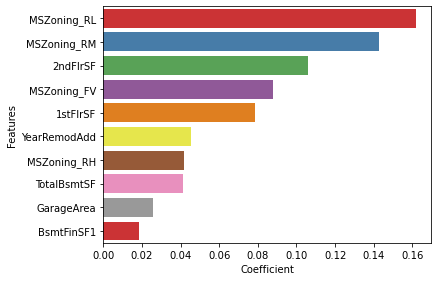

In [577]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp3_df)
plt.show()